In [192]:
import pandas as pd

titanic_url = "https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/titanic.xls"
train_data = pd.read_excel(titanic_url)

In [193]:
train_data.head()

train_data.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')

In [194]:
import matplotlib.pyplot as plt
import seaborn as sns

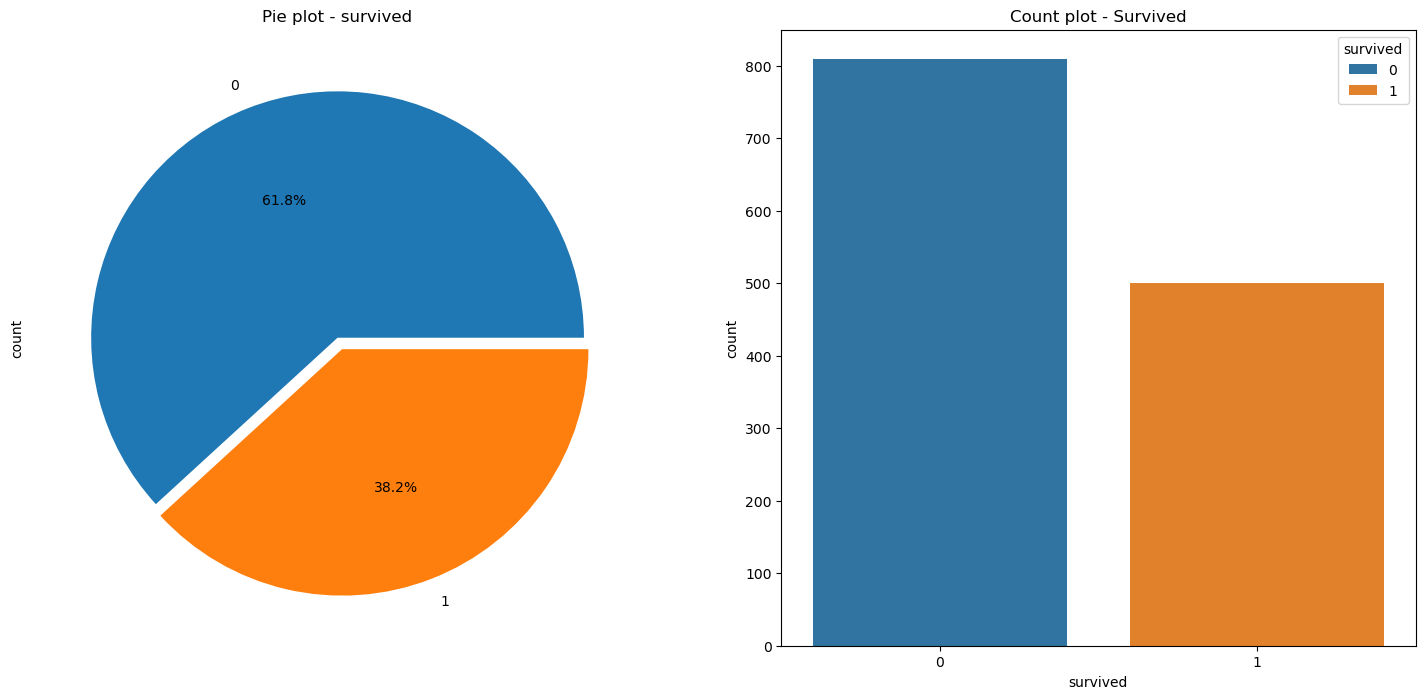

In [195]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

ax[0].set_title('Pie plot - survived')
ax[0].set_ylabel('')
train_data['survived'].value_counts().plot.pie(ax = ax[0], autopct='%1.1f%%', explode=[0, 0.05])

sns.countplot(x='survived', hue='survived', data=train_data, ax=ax[1])
ax[1].set_title('Count plot - Survived')
plt.show()

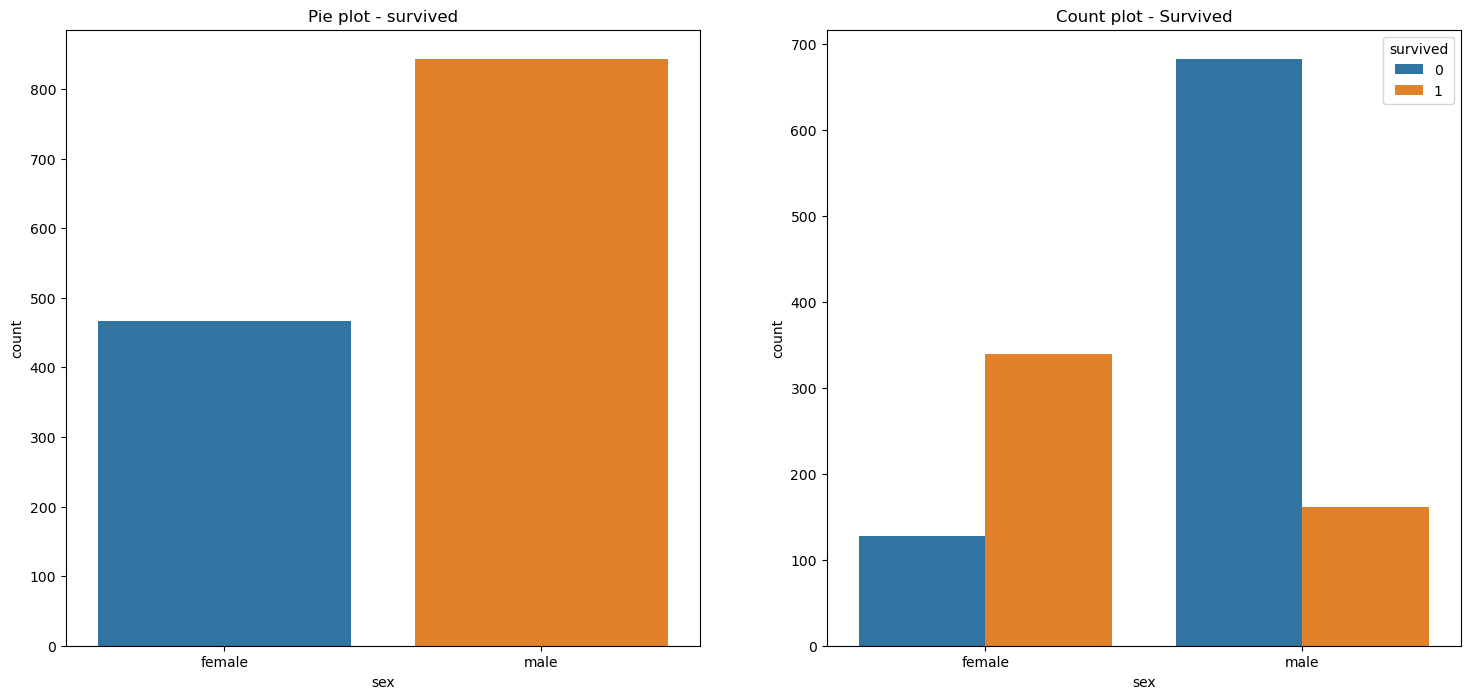

In [196]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

ax[0].set_title('Pie plot - survived')
ax[0].set_ylabel('')
sns.countplot(x='sex', hue='sex', data=train_data, ax=ax[0])

sns.countplot(x='sex', hue='survived', data=train_data, ax=ax[1])
ax[1].set_title('Count plot - Survived')
plt.show()

In [197]:
pd.crosstab(train_data['pclass'], train_data['survived'], margins=True)

survived,0,1,All
pclass,,,
1,123,200,323
2,158,119,277
3,528,181,709
All,809,500,1309


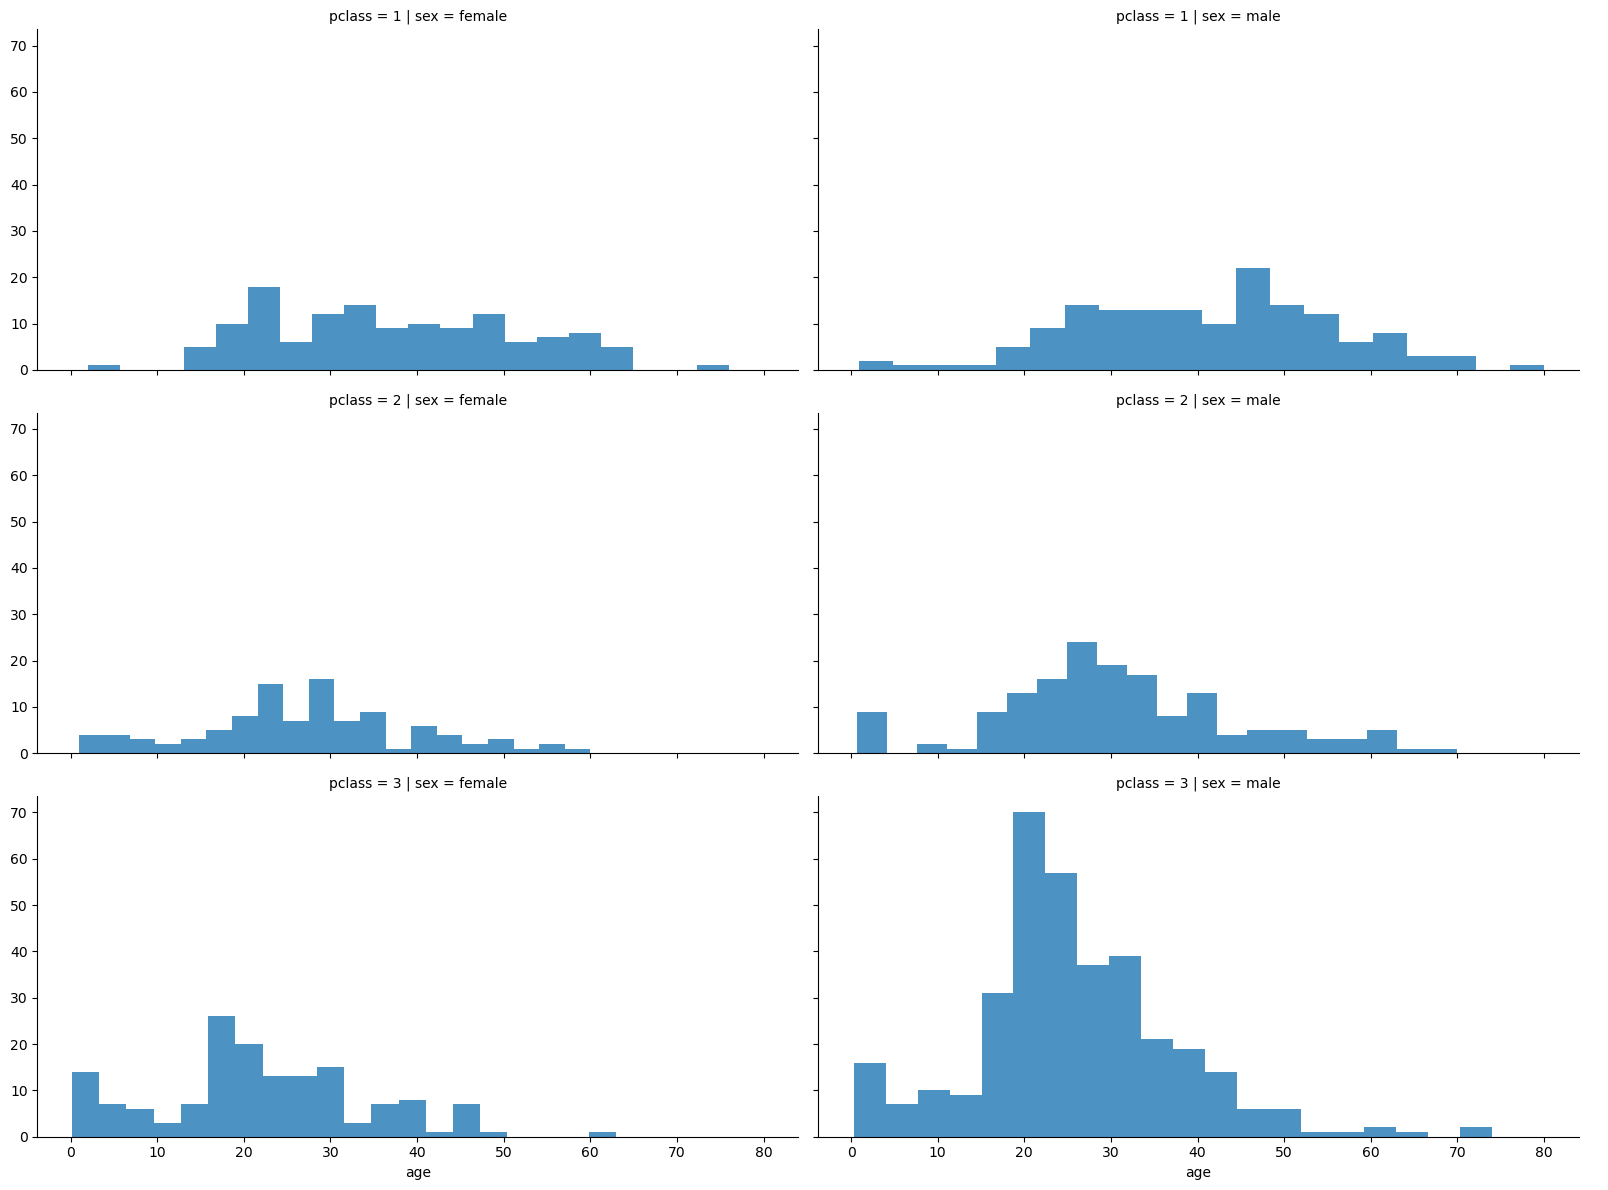

In [198]:
# 행에 Pclass(1,2,3) 열에 Sex(M, F)를 두어 각 행과 열이 가질 수 있는 값을 높이4 가로는 높이*2의 크기로 지정
grid = sns.FacetGrid(train_data, row='pclass', col='sex', height=4, aspect=2)

# 그리드 지정 후 나이에 대한 히스토그램을 그림, 막대 투명도는 0.8이고 가로 간격은 20
grid.map(plt.hist, 'age', alpha=0.8, bins=20)

# 각 섹션에 범례를 추가하여 도표를 시각화
grid.add_legend()

In [199]:
import plotly.express as px

fig = px.histogram(train_data, x='age')
fig.show()

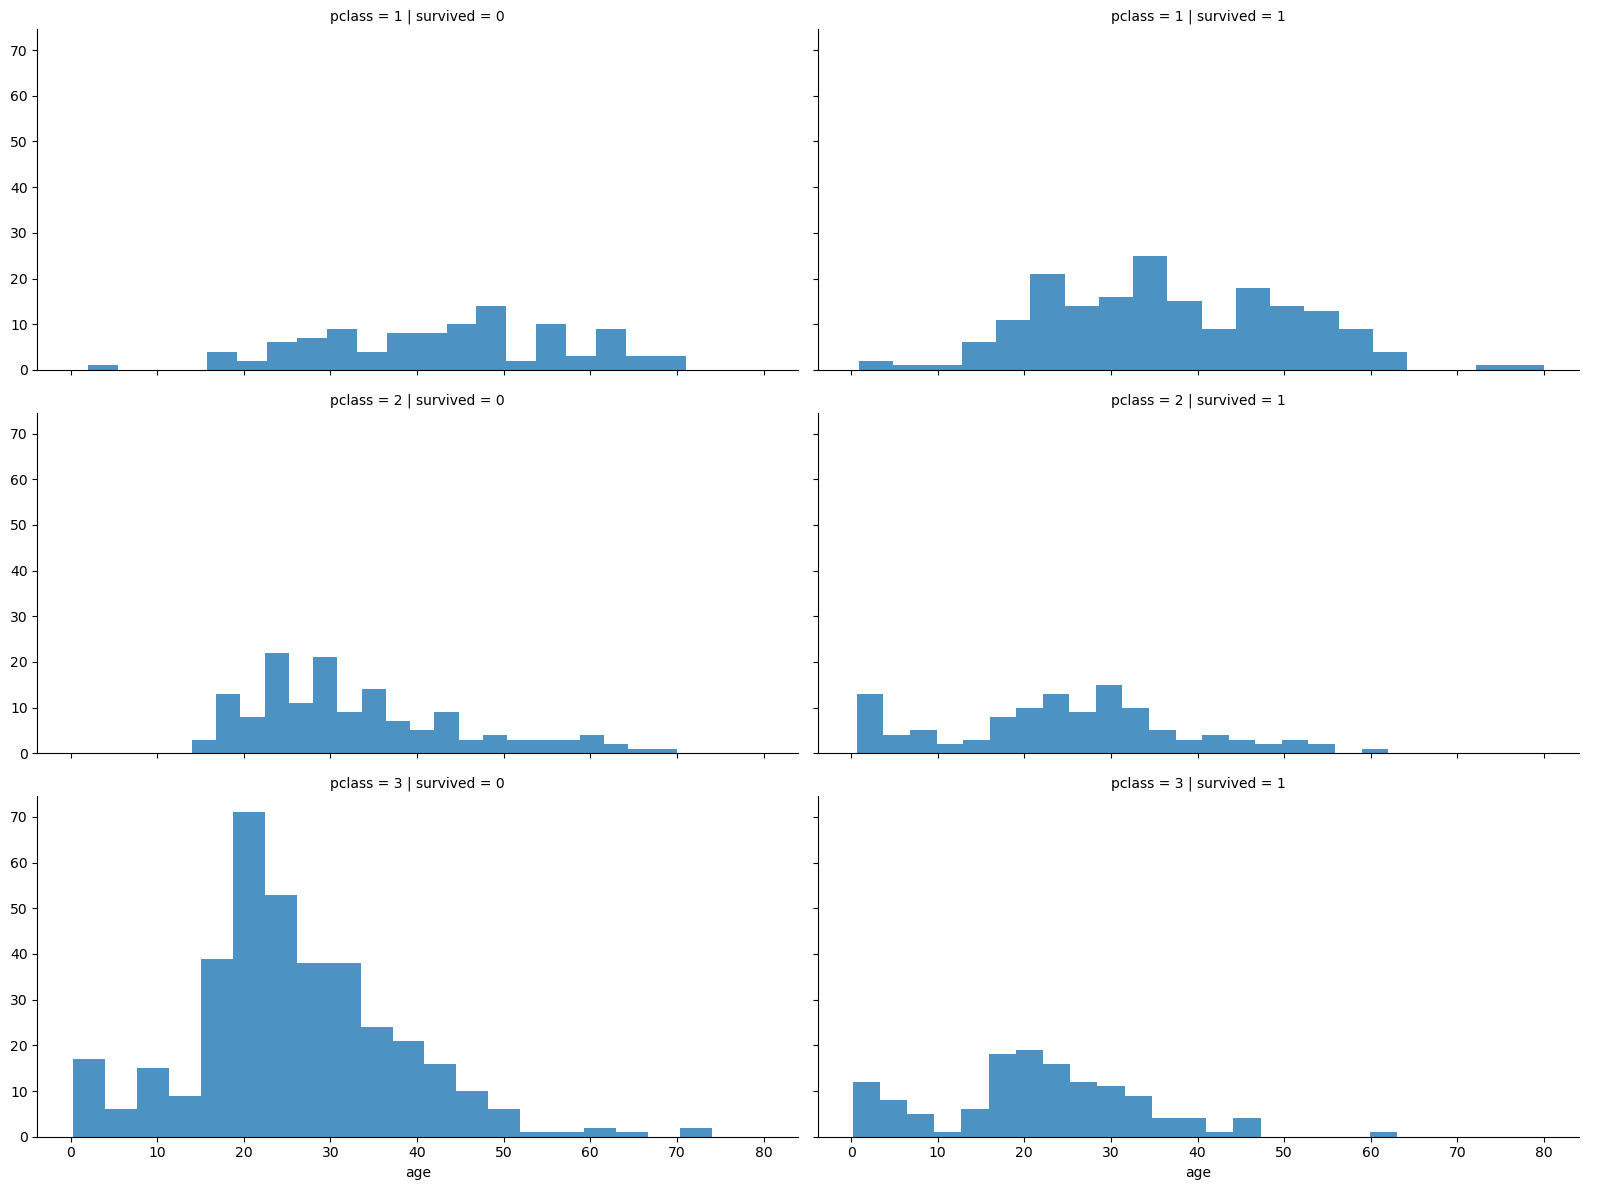

In [200]:
# 행에 Pclass(1,2,3) 열에 Survived(0, 1)를 두어 각 행과 열이 가질 수 있는 값을 높이4 가로는 높이*2의 크기로 지정
grid = sns.FacetGrid(train_data, row='pclass', col='survived', height=4, aspect=2)

# 그리드 지정 후 나이에 대한 히스토그램을 그림, 막대 투명도는 0.8이고 가로 간격은 20
grid.map(plt.hist, 'age', alpha=0.8, bins=20)

# 각 섹션에 범례를 추가하여 도표를 시각화
grid.add_legend()

In [201]:
train_data['age_cat']=pd.cut(train_data['age'], bins=[0, 7, 15, 30, 60, 100], 
    include_lowest=True,
    labels = ['baby','teen','young','adult','old']
    )

train_data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_cat
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",young
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",baby
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",baby
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",young
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",young


<Axes: xlabel='sex', ylabel='survived'>

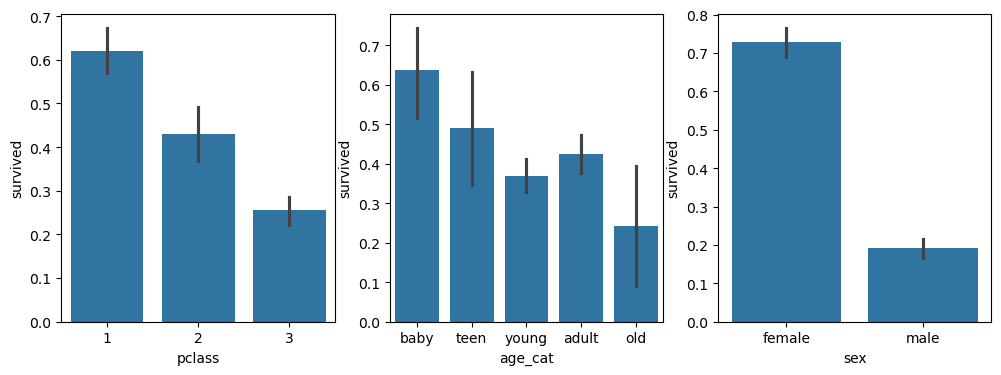

In [202]:
plt.figure(figsize=(12, 4))
plt.subplot(131)
sns.barplot(x='pclass', y='survived', data=train_data)

plt.subplot(132)
sns.barplot(x='age_cat', y='survived', data=train_data)

plt.subplot(133)
sns.barplot(x='sex', y='survived', data=train_data)

/var/folders/h1/hp_50qr12jg40vj15b94d35w0000gn/T/ipykernel_54545/811685066.py:5: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


/var/folders/h1/hp_50qr12jg40vj15b94d35w0000gn/T/ipykernel_54545/811685066.py:6: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


/var/folders/h1/hp_50qr12jg40vj15b94d35w0000gn/T/ipykernel_54545/811

Text(0.5, 1.0, 'Male')

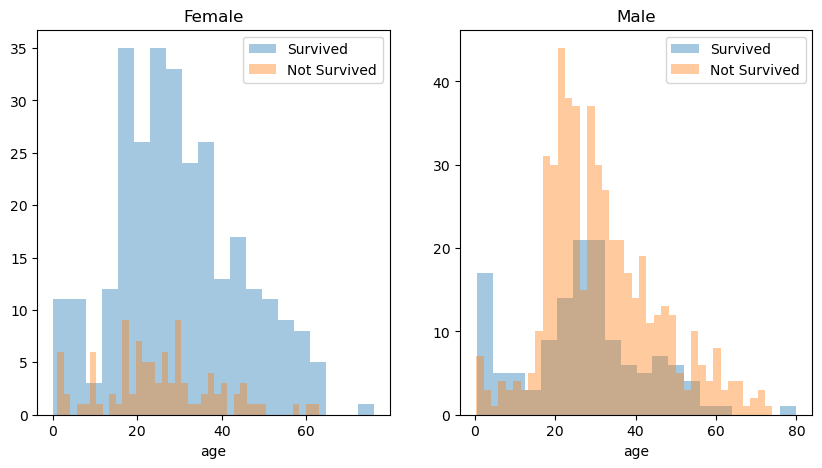

In [203]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
women = train_data[train_data['sex']=='female']
man = train_data[train_data['sex']=='male']

ax = sns.distplot(women[women['survived']==1]['age'], bins=20, label='Survived', ax=axes[0], kde=False)
ax = sns.distplot(women[women['survived']==0]['age'], bins=40, label='Not Survived', ax=axes[0], kde=False)
ax.legend(); ax.set_title('Female')

ax = sns.distplot(man[man['survived']==1]['age'], bins=20, label='Survived', ax=axes[1], kde=False)
ax = sns.distplot(man[man['survived']==0]['age'], bins=40, label='Not Survived', ax=axes[1], kde=False)
ax.legend(); ax.set_title('Male')


In [204]:
import re

title = []
for idx, dataset in train_data.iterrows():
    tmp = dataset['name']
    title.append(re.search('\,\s\w+(\s\w+)?\.', tmp).group()[2:-1])

train_data['title']=title
train_data.head()

<>:6: SyntaxWarning:

invalid escape sequence '\,'

<>:6: SyntaxWarning:

invalid escape sequence '\,'

/var/folders/h1/hp_50qr12jg40vj15b94d35w0000gn/T/ipykernel_54545/2642456720.py:6: SyntaxWarning:

invalid escape sequence '\,'



,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_cat,title
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",young,Miss
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",baby,Master
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",baby,Miss
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",young,Mr
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",young,Mrs


In [205]:
pd.crosstab(train_data['title'], train_data['sex'])

sex,female,male
title,,
Capt,0,1
Col,0,4
Don,0,1
Dona,1,0
Dr,1,7
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,61


In [206]:
train_data['title'].unique()

array(['Miss', 'Master', 'Mr', 'Mrs', 'Col', 'Mme', 'Dr', 'Major', 'Capt',
       'Lady', 'Sir', 'Mlle', 'Dona', 'Jonkheer', 'the Countess', 'Don',
       'Rev', 'Ms'], dtype=object)

In [207]:
train_data['title'] = train_data['title'].replace('Mlle', 'Miss')
train_data['title'] = train_data['title'].replace('Ms', 'Miss')
train_data['title'] = train_data['title'].replace('Mme', 'Mrs')

Rare_f=['Dona', 'Lady', 'the Countess']
Rare_m=['Capt', 'Col', 'Don', 'Major', 'Rev', 'Sir', 'Dr', 'Master', 'Jonkheer']

In [208]:
for each in Rare_f:
    train_data['title'] = train_data['title'].replace(each, 'Rare_f')
    
for each in Rare_m:
    train_data['title'] = train_data['title'].replace(each, 'Rare_m')

In [209]:
train_data[['title','survived']].groupby(['title'], as_index=False).mean()

,title,survived
0,Miss,0.678030
1,Mr,0.162483
2,Mrs,0.787879
3,Rare_f,1.000000
4,Rare_m,0.448276


## 머신러닝 사용하기 위해서 숫자로 바꿔주어야 한다

In [210]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(train_data['sex'])
print(le.classes_)

train_data['gender'] = le.transform(train_data['sex'])
train_data.head()

['female' 'male']


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_cat,title,gender
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",young,Miss,0
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",baby,Rare_m,1
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",baby,Miss,0
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",young,Mr,1
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",young,Mrs,0


## 결측치를 처리해주어야 한다

In [211]:
train_data = train_data[train_data['age'].notnull()]
train_data = train_data[train_data['fare'].notnull()]

In [212]:
train_data.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest', 'age_cat',
       'title', 'gender'],
      dtype='object')

## 데이터를 나누자

In [215]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

X = train_data[['pclass', 'age', 'sibsp', 'parch', 'fare', 'gender']]
y = train_data['survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=13)

dt = DecisionTreeClassifier(max_depth=4, random_state=13)
dt.fit(X_train, y_train)
pred = dt.predict(X_test)
print(accuracy_score(y_test, pred))

0.7655502392344498


In [216]:
import numpy as np

# ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'gender']
dicaprio = np.array([[3, 18, 0, 0, 5, 1]])

print('Dicaprio: ', dt.predict_proba(dicaprio)[0, 1])

Dicaprio:  0.22950819672131148


/opt/homebrew/Caskroom/miniforge/base/envs/ds_study/lib/python3.12/site-packages/sklearn/base.py:464: UserWarning:

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names



In [218]:
winslet = np.array([[1, 16, 1, 1, 100, 0]])
print('Winslet: ', dt.predict_proba(winslet)[0, 1])

Winslet:  1.0


/opt/homebrew/Caskroom/miniforge/base/envs/ds_study/lib/python3.12/site-packages/sklearn/base.py:464: UserWarning:

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names

